# Customer Churn (with EDA & Modelling)

## Table of content
* [1. Introduction](#Introduction)
    * [1.1. Goals](#Goals)
    * [1.2. Libraries](#Libraries)
* [2. The Data](#TheData)
    * [2.1. Data Sample](#DataSample)
    * [2.2. Data Preprocessing](#DataPreprocessing)
* [3. Customer Profiles](#CustomerProfiles)
    * [3.1. Exploratory Data Analysis](#EDA)
    * [3.2. Churn and Non Churn Profiles](#Profiles)
* [4. Customer Churn Prediction](#CustomerChurnPrediction)
    * [4.1. Data Preperation](#DataPrep)
    * [4.2. Model Training](#ModelTraining)
    * [4.3. Model Evaluation](#ModelEvaluation)
    * [4.4. Hyperparameter tuning](#Hyperparameter)
    * [4.5. Feature Importance](#FeatureImportance)
* [5. Conclusion](#Conclusion)



# 1. Introduction


## 1.1. Goals
The goal of this notebook is to answer both tasks given for the Bank customers.

The first goal of this project is to provide an analysis which shows the **difference** between a **non-churning and churning customer**. This will provide us insight into which customers are eager to churn.

The top priority of this case is to identify if a customer will churn or won't. It's important that we don't **predict** churning as non-churning customers. 

<a id="Libraries"></a>
## 1.2. Libraries
Libraries used can be found in the code block underneed.

In [18]:
# Libraries
import os

# Used for EDA, Customer profiling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from imblearn.over_sampling import SMOTE

# from sklearn.preprocessing import LabelEncoder
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, learning_curve, train_test_split
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
# from sklearn.inspection import permutation_importance

# from xgboost import XGBClassifier

from scipy import stats
from scipy.stats import randint
from scipy.stats import uniform


# Presets
%matplotlib inline
sns.set()

# 2. The Data

## 2.1. Data sample


* ***Basic information***:
    * **CLIENTNUM** : Unique identifier for the customer holding the account.


* ***Target/Label***:
    * **Attrition_Flag**: Internal event (customer activity) variable - if the account is closed then 1 else 0.


* ***Demographic variables***:
    * **Customer_Age**: Demographic variable - Customer's Age in Years.
    * **Gender**: Demographic variable - M=Male, F=Female.
    * **Dependent_count**: Demographic variable - Number of dependents.
    * **Education_Level**: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.).
    * **Marital_Status**: Demographic variable - Married, Single, Divorced, Unknown.
    * **Income_Category**: Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >).
    

* ***Product variables***:
    * **Card_Category**: Product Variable - Type of Card (Blue, Silver, Gold, Platinum).
    * **Months_on_book**: Period of relationship with bank.
    * **Total_Relationship_Count**: Total no. of products held by the customer.
    * **Months_Inactive_12_mon**: No. of Months in the last 12 months.
    * **Contacts_Count_12_mon**: No. of Contacts in the last 12 months.
    * **Credit_Limit**: Credit Limit on the Credit Card.
    * **Total_Revolving_Bal**: Total Revolving Balance on the Credit Card.
    * **Avg_Open_To_Buy**: Open to Buy Credit Line (Average of last 12 months
    * **Total_Amt_Chng_Q4_Q1**: Change in Transaction Amount (Q4 over Q1).
    * **Total_Trans_Amt**: Total Transaction Amount (Last 12 months).
    * **Total_Trans_Ct**: Total Transaction Count (Last 12 months).
    * **Total_Ct_Chng_Q4_Q1**: Change in Transaction Count (Q4 over Q1).
    * **Avg_Utilization_Ratio**: Average Card Utilization Ratio.


* ***Unimportant variables***:
    * **Naive_Bayes**: It was mentioned that all columns containing the "N.B."-tag should be disregarded.


In [19]:
data = pd.read_csv('customers.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


<a id="DataPreprocessing" ></a>
## 2.2. Data Preprocessing
In this phase we'll quickly explore the data and remove/impute incorrect values. So that a cleaned data can be used for further analysis/modelling.

* Remove unnecessary columns.
* Check for duplicates.
* Change ID to client number.
* Check for null values.



### Remove N.B. columns

In [20]:
# Removing the N.B. columns
data = data.drop(columns= ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [21]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [22]:
for column in data.columns:
    print("Column name: " + column)

print("Column count: " + str(len(data.columns)))

Column name: CLIENTNUM
Column name: Attrition_Flag
Column name: Customer_Age
Column name: Gender
Column name: Dependent_count
Column name: Education_Level
Column name: Marital_Status
Column name: Income_Category
Column name: Card_Category
Column name: Months_on_book
Column name: Total_Relationship_Count
Column name: Months_Inactive_12_mon
Column name: Contacts_Count_12_mon
Column name: Credit_Limit
Column name: Total_Revolving_Bal
Column name: Avg_Open_To_Buy
Column name: Total_Amt_Chng_Q4_Q1
Column name: Total_Trans_Amt
Column name: Total_Trans_Ct
Column name: Total_Ct_Chng_Q4_Q1
Column name: Avg_Utilization_Ratio
Column count: 21


### Check for duplicates and change ID to ClientNumber

In [23]:
# True if duplicates are present
data.duplicated().any()

False

In [24]:
# Change the ID to the ClientNumber
data = data.set_index("CLIENTNUM")

In [25]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Null values?

In [26]:
# Describe columns
data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

<a id="CustomerProfiles"></a>
# 3. Customer Profiles
Let's now explore and understand our data! 
<a id="EDA"></a>
## 3.1. Exploratory Data Analysis (EDA)

EDA tasks:

* Check the target variable:
    * Amount of attrition.


* Check the demographic variables:
    * Age vs attrition.
    * Gender vs churn.
    * Number of dependents vs churn.
    * Education level vs churn.
    * Marital status vs churn.
    * Income category vs churn.


* Check the product variables:
    * Type of card vs churn.
    * Relationship with the bank vs churn.
    * Number of products vs churn.
    * Inactive months vs churn.
    * Number of contacts vs churn.
    * Credit Limit vs churn.
    * Total resolving balance vs churn.
    * Openness To Buy Credit Line vs churn.
    * Transaction Amount Change vs churn.
    * Transaction Count Change vs churn.
    * Average Card Utilization Ratio vs churn.

## Check the target variable
### Amount of churned customers
How many customers have churned?

In [2]:
target = data["Attrition_Flag"].value_counts()
fig1, ax1 = plt.subplots(figsize=(3, 3))

ax1.pie(target,labels=target.index,autopct='%1.1f%%',shadow=None)
ax1.axis('equal')
plt.title("Amount of churned customers", fontsize=14)
plt.show()

NameError: name 'data' is not defined

It's clear that the majority of our customers (83.9 %) stays. Since "attrited" or "churned" label is less then 20% of the total all customers.  We can say that we have an imbalanced data.

In [1]:
churned = data[data['Attrition_Flag'] == "Attrited Customer"]
nonchurned = data[data['Attrition_Flag'] == "Existing Customer"]

def plot_pie(column):
    target = data[column].value_counts()    
    fig1, ax1 = plt.subplots()    
    ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
    ax1.axis('equal')
    plt.title("All customers", fontsize=14)
    plt.show()
    
def plot_compare(column, category_name):
    NChurned = len(churned[column].unique())
    NNonChurned = len(nonchurned[column].unique())
    
    ChurnedCounts = churned[column].value_counts().sort_index()
    NonChurnedCounts = nonchurned[column].value_counts().sort_index()
    
    indchurned = np.arange(NChurned)    # the x locations for the groups
    indnonchurned = np.arange(NNonChurned)    
    width = 1       # the width of the bars: can also be len(x) sequence
    
    figs, axs = plt.subplots(1,2, figsize=(12,5))
    
    axs[1].bar(indchurned, ChurnedCounts, width, color='#DD8452')
    axs[1].set_title('Churned ' + category_name, fontsize=20)
    axs[1].set_xticks(indchurned)
    axs[1].set_xticklabels(ChurnedCounts.index.tolist(), rotation=45)
    
    axs[0].bar(indnonchurned, NonChurnedCounts, width, color='b')
    axs[0].set_title('Non Churned ' + category_name, fontsize=20)
    axs[0].set_ylabel('Amount of People')
    axs[0].set_xticks(indnonchurned)
    axs[0].set_xticklabels(NonChurnedCounts.index.tolist(), rotation=45)
    
    
    plt.show()

NameError: name 'data' is not defined

## Checking the demographic variables
### Age compared to the churn

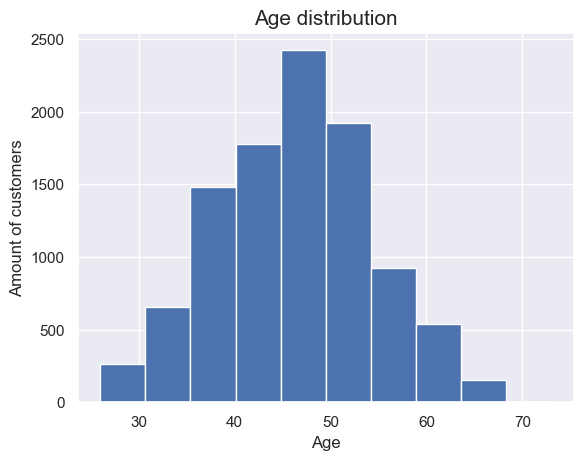

In [29]:
# Checking the overal distribution
data["Customer_Age"].hist()
plt.xlabel("Age")
plt.ylabel("Amount of customers")
plt.title("Age distribution", fontsize=15)
plt.show()

### Gender vs churn
Are males of females more eager to churn?

F    930
M    697
Name: Gender, dtype: int64


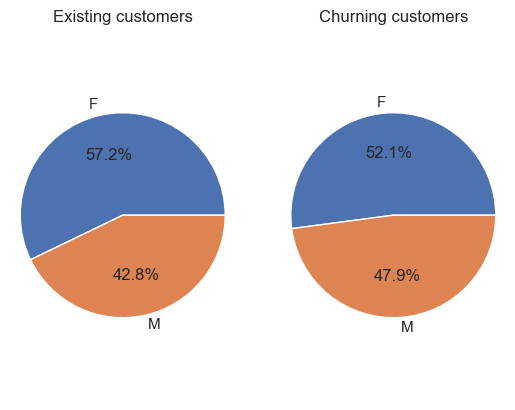

In [30]:
churnedtarget = churned["Gender"].value_counts()
print(churnedtarget)
nonchurnedtarget = nonchurned["Gender"].value_counts()

fig1, axs = plt.subplots(1, 2)

axs[0].pie(churnedtarget, labels=churnedtarget.index, autopct='%1.1f%%', shadow=None)
axs[0].axis('equal')
axs[0].set_title('Existing customers')

axs[1].pie(nonchurnedtarget, labels=nonchurnedtarget.index, autopct='%1.1f%%', shadow=None)
axs[1].axis('equal')
axs[1].set_title('Churning customers')

plt.show()

The difference is too small to say that one gender is more eager to churn.

### Number of dependents vs churn

0    135
1    269
2    417
3    482
4    260
5     64
Name: Dependent_count, dtype: int64


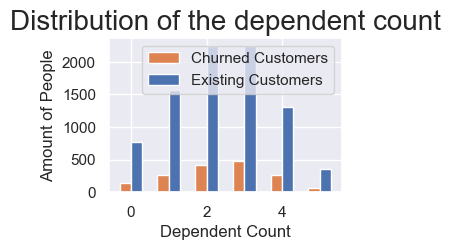

In [31]:
N = 6
ChurnedCounts = churned["Dependent_count"].value_counts().sort_index()
print(ChurnedCounts)
# ChurnedCounts = churned["Dependent_count"].value_counts()
# print("without : ", ChurnedCounts)

NonChurnedCounts = nonchurned["Dependent_count"].value_counts().sort_index()

ind = np.arange(N)    # the x locations for the groups
width = 0.3       # the width of the bars: can also be len(x) sequence

figs, axs = plt.subplots(figsize=(3,2))

axs.bar(ind - width/2, ChurnedCounts, width, color = "#DD8452")
axs.bar(ind + width/2, NonChurnedCounts, width)

axs.set_xlabel('Dependent Count')
axs.set_ylabel('Amount of People')
axs.set_title('Distribution of the dependent count', fontsize=20)
# axs.set_xticks(ind, ('0', '1', '2', '3', '4', '5'))
axs.legend(('Churned Customers','Existing Customers',))

plt.show()

In [16]:
churned['Dependent_count'].describe()

NameError: name 'churned' is not defined

In [17]:
nonchurned['Dependent_count'].describe()

NameError: name 'nonchurned' is not defined

The dependent count shows us a normal distribution. No clear shift is visible when comparing the churned- and non churned distribution.